In [2]:
from Data import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from statsmodels.api import OLS
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
%matplotlib inline
data=Data()

In [14]:
data.merge_dataset(exclude_columns=['sub_grade','Volatility'], type='dummy')
X_train, X_test, y_train, y_test = data.get_train_test_set()

model = LogisticRegression()
model.fit(X_train,y_train)

pred0 = pd.DataFrame(model.predict(X_train), columns =['trainPred'])
df = pd.concat([pred0, data.df], axis=1, join='inner')

dfmean = df[['trainPred','Volatility','default']].groupby(df.Date).mean()
X = dfmean[['trainPred','Volatility']]
y = dfmean.default
ols = OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     395.6
Date:                Thu, 09 Feb 2017   Prob (F-statistic):           4.40e-47
Time:                        12:11:31   Log-Likelihood:                 78.718
No. Observations:                  98   AIC:                            -153.4
Df Residuals:                      96   BIC:                            -148.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
trainPred      0.4585      0.059      7.809      0.000         0.342     0.575
Volatility     0.7900      0.089      8.914      0.000         0.614     0.966
==============================================================================
Omnibus:                       15.502   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.401
Skew:                           0.984   Prob(JB):                     0.000167
Kurtosis:                       3.623   Cond. No.                         3.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

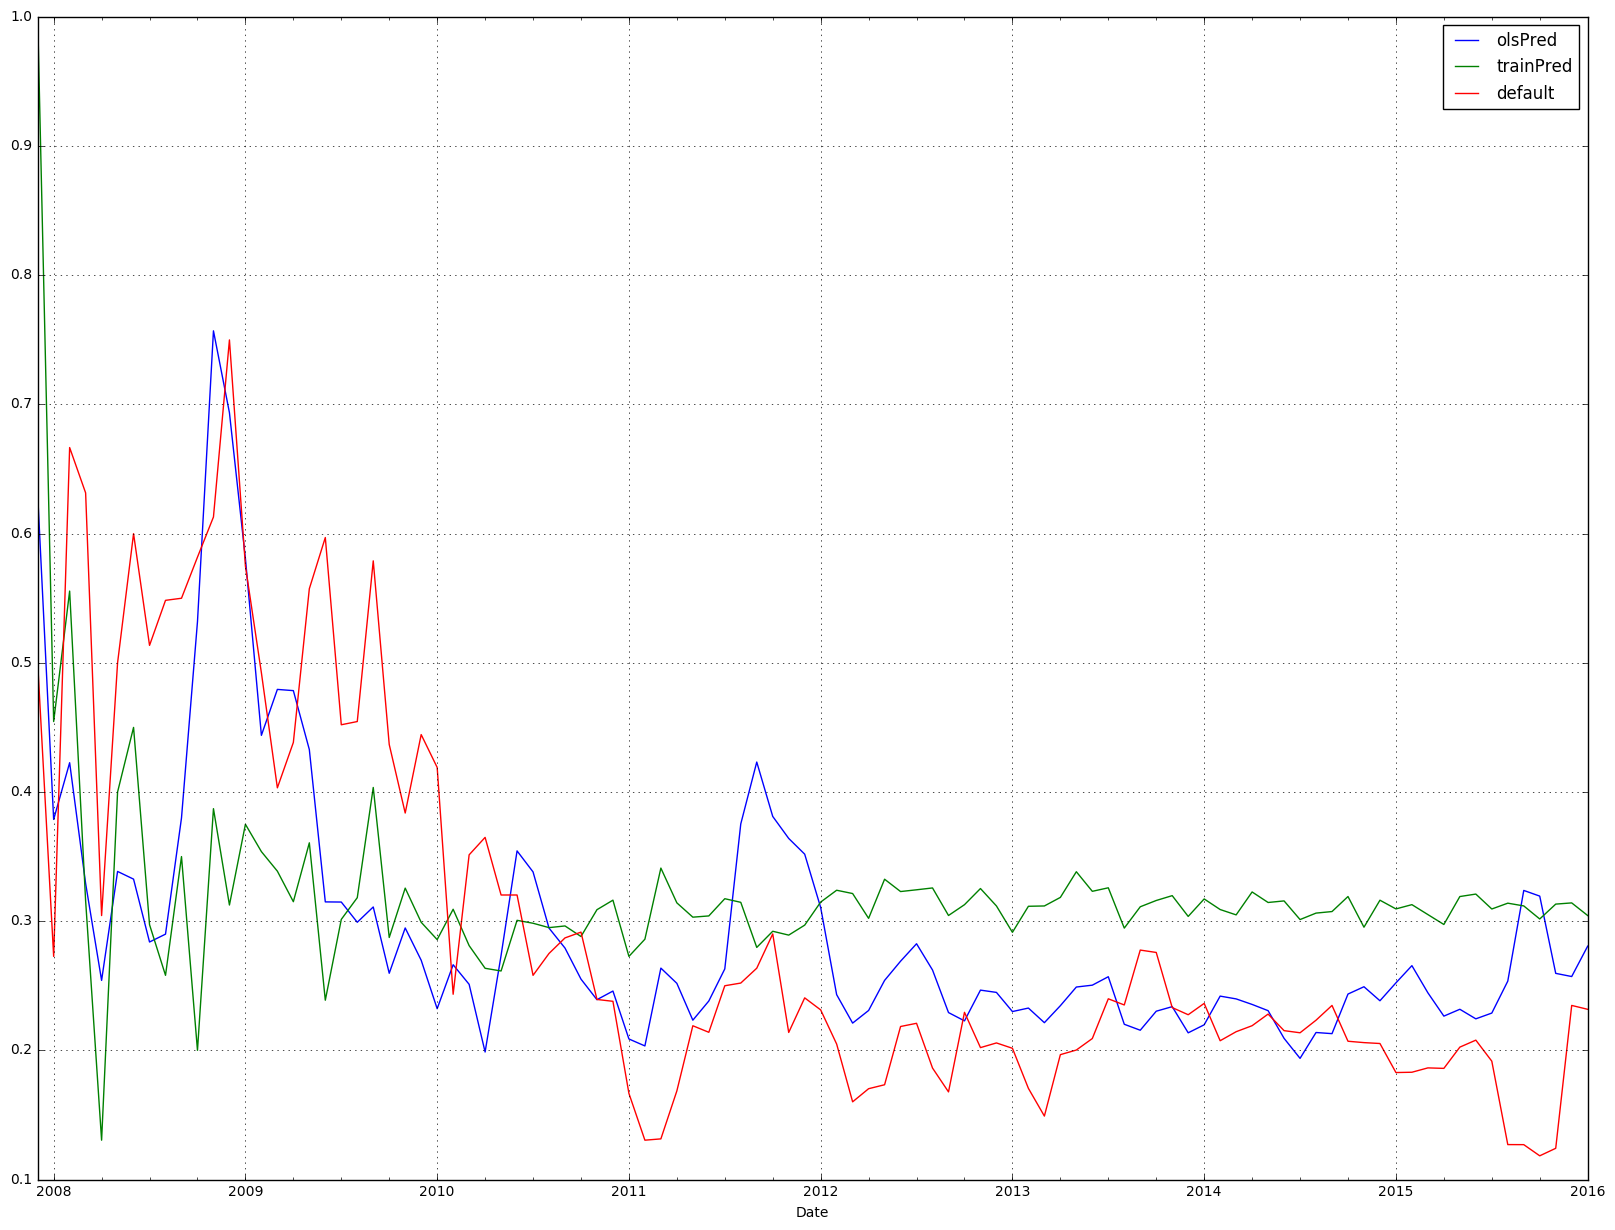

In [17]:
dfmean['olsPred'] = ols.predict(X)
dfmean[['olsPred','trainPred','default']].plot().grid()

In [8]:
print (r2_score(dfmean.default,dfmean.olsPred),
r2_score(dfmean.default,dfmean.trainPred),
mean_squared_error(dfmean.default,dfmean.olsPred)**.5,
mean_squared_error(dfmean.default,dfmean.trainPred)**.5)

(0.45639468757242352, -0.056041152746667544, 0.10837251060110292, 0.15104894964336679)


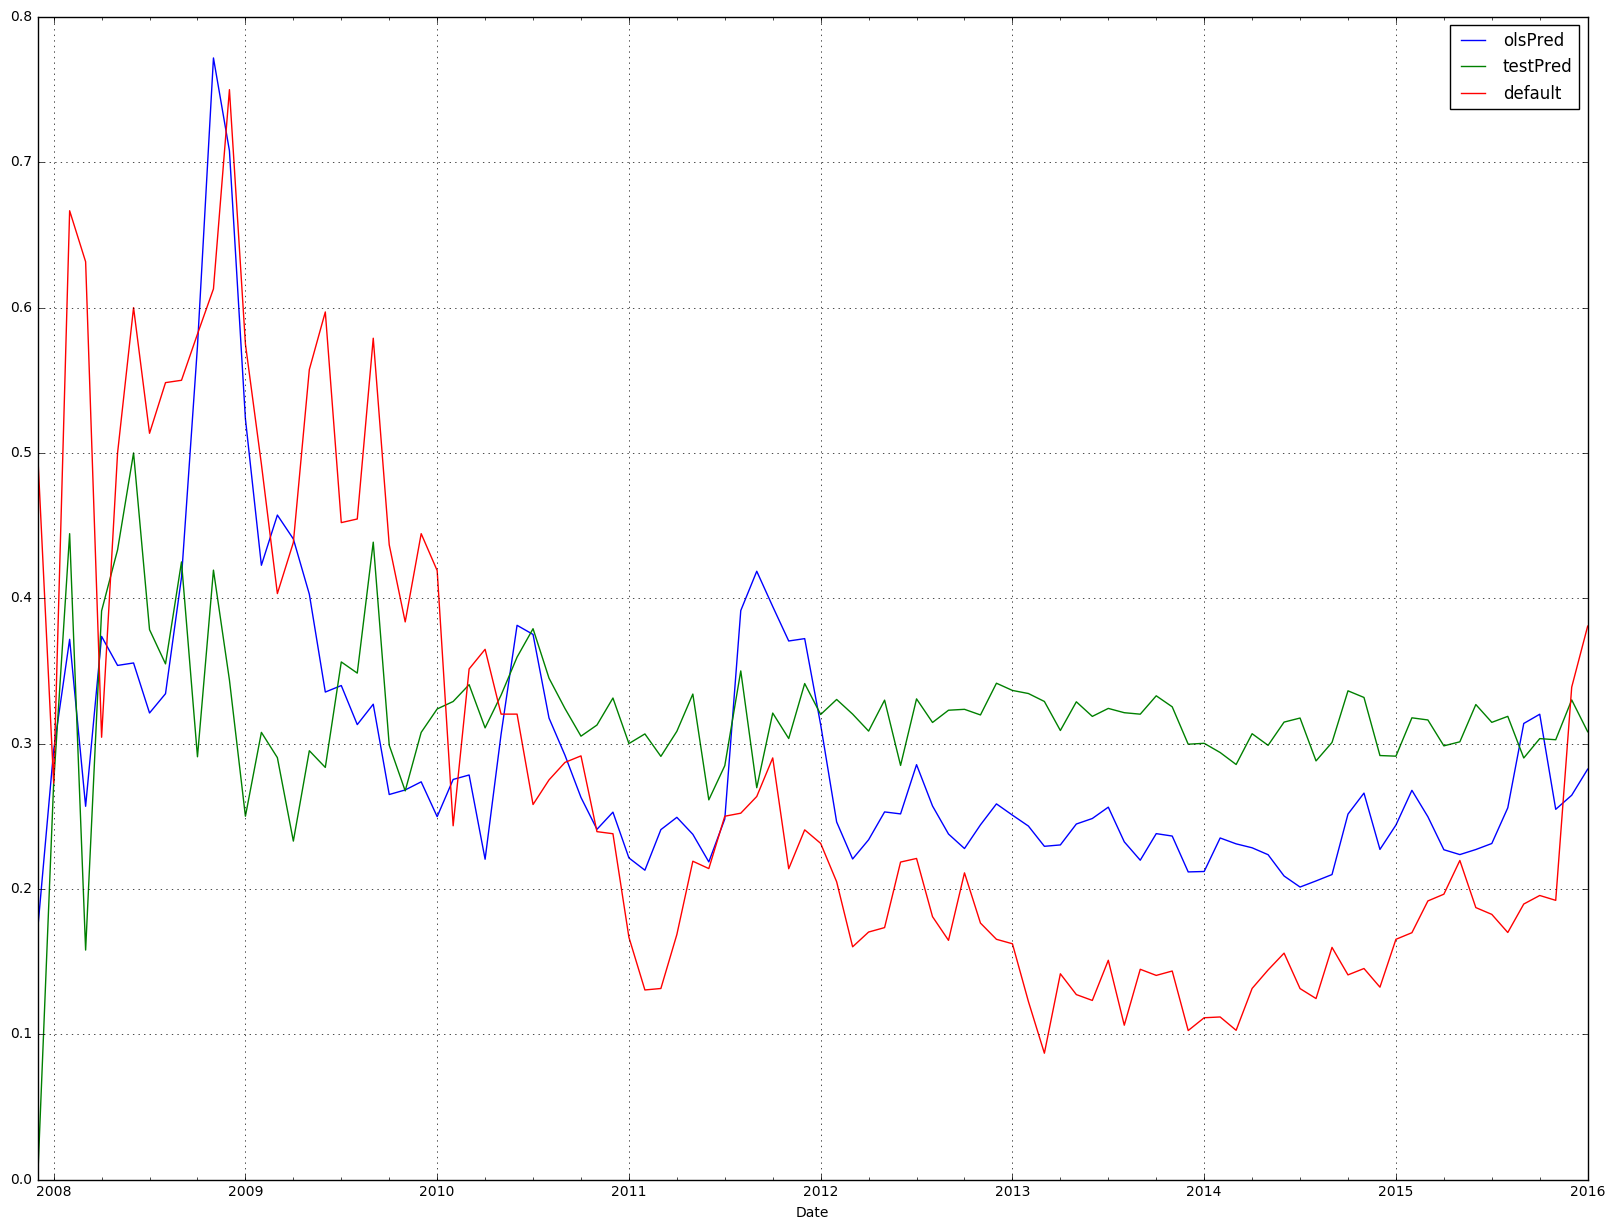

In [18]:
pred1 = pd.DataFrame(model.predict(X_test), columns =['testPred'])
df = pd.concat([pred1, data.df], axis=1, join='inner')

dfmean = df[['testPred','Volatility','default']].groupby(df.Date).mean()
X = dfmean[['testPred','Volatility']]
y = dfmean.default
dfmean['olsPred'] = ols.predict(X)
dfmean[['olsPred','testPred','default']].plot().grid()

In [10]:
print (r2_score(dfmean.default,dfmean.olsPred),
r2_score(dfmean.default,dfmean.testPred),
mean_squared_error(dfmean.default,dfmean.olsPred)**.5,
mean_squared_error(dfmean.default,dfmean.testPred)**.5)

(0.44542535743679879, -0.085472222964853684, 0.11988660742738359, 0.16772585864566783)
